# Fusión de imágenes con modo amplitud

## Autores:
 - Álvaro Baños Gomez, UO245853.
 - Guillermo Facundo Colunga, UO236856.
 - Alejandro León Pereira, UO258774.
 - Iñaki Salgado Uralde, UO237133.

Existen diferentes modos de combinar dos imágenes, uno de ellos es el modo amplitud, que se define con la siguiente fórmula:

$$(x{_{3}}, y{_{3}}, z{_{3}}) = \left ( \frac{\sqrt{x{_{1}}^{2} + x{_{2}}^{2}}}{\sqrt{2}},  \frac{\sqrt{y{_{1}}^{2} + y{_{2}}^{2}}}{\sqrt{2}}, \frac{\sqrt{z{_{1}}^{2} + z{_{2}}^{2}}}{\sqrt{2}} \right )$$

Donde $(x{_{3}}, y{_{3}}, z{_{3}})$ son las coordenadas RGB de la imágen resultante. De la formula anterior podemos extraer una función de transformación que se puede aplicar a dos imágenes enteras para obtener una tercera en un sólo paso, esta función sería:

$$f(imagen_{x}, imagen_{y}) = \left ( \frac{\sqrt{imagen_{x}^{2} + imagen_{y}^{2}}}{\sqrt{2}} \right )$$

### Análisis de la función

La función anterior recibirá dos vectores con valores comprendidos en $[0.0, ..., 255.0]$. Por lo tanto vamos a ver que valores devuelve dentro de ese dominio:

Imports necesarios:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Creamos dos vectores que recojen todos los posibles valores de una imagen, [0.0, ..., 255.0]:

In [2]:
values_1 = np.arange(256.0)
values_2 = np.arange(256.0)

Definimos nuestra función de transformación a portir de la fórmula anterior:

In [3]:
def fusion(x, y): return (np.sqrt(x**2 + y**2)/math.sqrt(2))

Observamos los valores obtenidos tras aplicar nuestra función de transformación sobre los vectores anteriores:

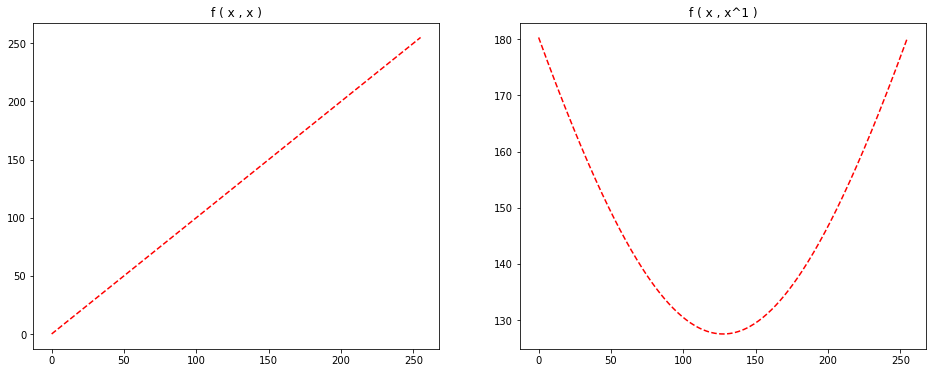

In [4]:
f, axarr = plt.subplots(1,2, figsize=(16,6))
axarr[0].plot(fusion(values_1, values_2), '--r')
axarr[0].set_title('f ( x , x )')
axarr[1].plot(fusion(values_1, values_2[::-1]), '--r')
axarr[1].set_title('f ( x , x^1 )')
plt.show()

En las gráficas muestran los resultados de aplicar la función de transformación sobre la misma imágen y sobre una imágen opuesta, así conseguimos probar los distintos límites de nuestro algoritmo.

Parece que el máximo valor se alcalza cuando aplicamos la función de transformación sobre la misma imágen, lo que tiene sentido ya que tiene que las variables de la función de transformación toman sus valores máximos $(255.0)$. Pero para asegurar vamos a extraer el máximo del resultado de aplicar la fucnión sobre la misma imagen:

In [5]:
print("Valor máximo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]:",
      max(fusion(values_1, values_2)))

Valor máximo de aplicar la función sobre vectores en rango [0.0, ..., 255.0]: 255.0


Por lo tanto podemos asegurar que la imágen resultante de aplicar este algoritmo no saturará los valores de destino. Esto podría comprobarse también con un análisi matemático del problema, ya que:

$$\lim_{\left ( x,y \right ) \rightarrow \left [ 0.0,0.0 \right ]} \frac{\sqrt{x^{2} + y^{2}}}{\sqrt{2}} = 0.0$$

$$\lim_{\left ( x,y \right ) \rightarrow \left [ 255.0,255.0 \right ]} \frac{\sqrt{x^{2} + y^{2}}}{\sqrt{2}} = 255.0$$

## Ejemplo de implementaciónen python:

Realizamos los imports necesarios:

In [6]:
import matplotlib.image as mpimg
from PIL import Image

A continuación cargamos las imágenes y las mostramos.

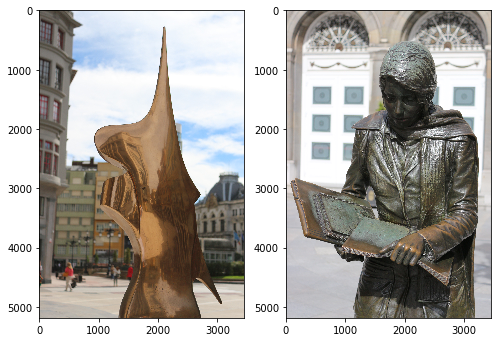

In [7]:
# Loading the images.
bailarinaimg=mpimg.imread('data/bailarina.bmp')
figuraimg=mpimg.imread('data/figura.bmp')

# Plotting the images.
f, axarr = plt.subplots(1,2, figsize=(7,7))

# Formating the plot.
f.tight_layout()

# Drawing the images.
axarr[0].imshow(bailarinaimg)
axarr[1].imshow(figuraimg)
plt.show()

Ahora aplicamos nuestra función de transformación a las imágenes anteriores y guardamos el resultado en una nueva imagen. 

In [8]:
imagen_fusionada = fusion(bailarinaimg.astype(float), figuraimg.astype(float))
imagen_fusionada = Image.fromarray(imagen_fusionada.astype(np.uint8), 'RGB')

Y finalmente imprimimos las imágenes de partida y la imagen fusionada resultante.

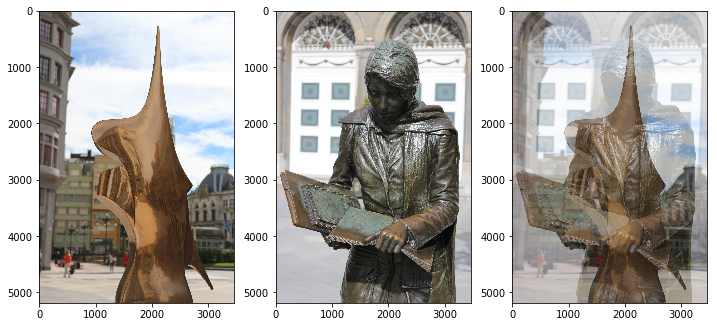

In [9]:
# Creating the plot
f, axarr = plt.subplots(1,3, figsize=(10,10))

# Formatting the images.
f.tight_layout()

# Drawing the images
axarr[0].imshow(bailarinaimg)
axarr[1].imshow(figuraimg)
axarr[2].imshow(imagen_fusionada)

# Showing the plot.
plt.show()

### Imágen fusionada

Tras aplicar nuestra función de transformación a la imagen bailarina y a la imagen figura obtenemos la siguiente imagen:

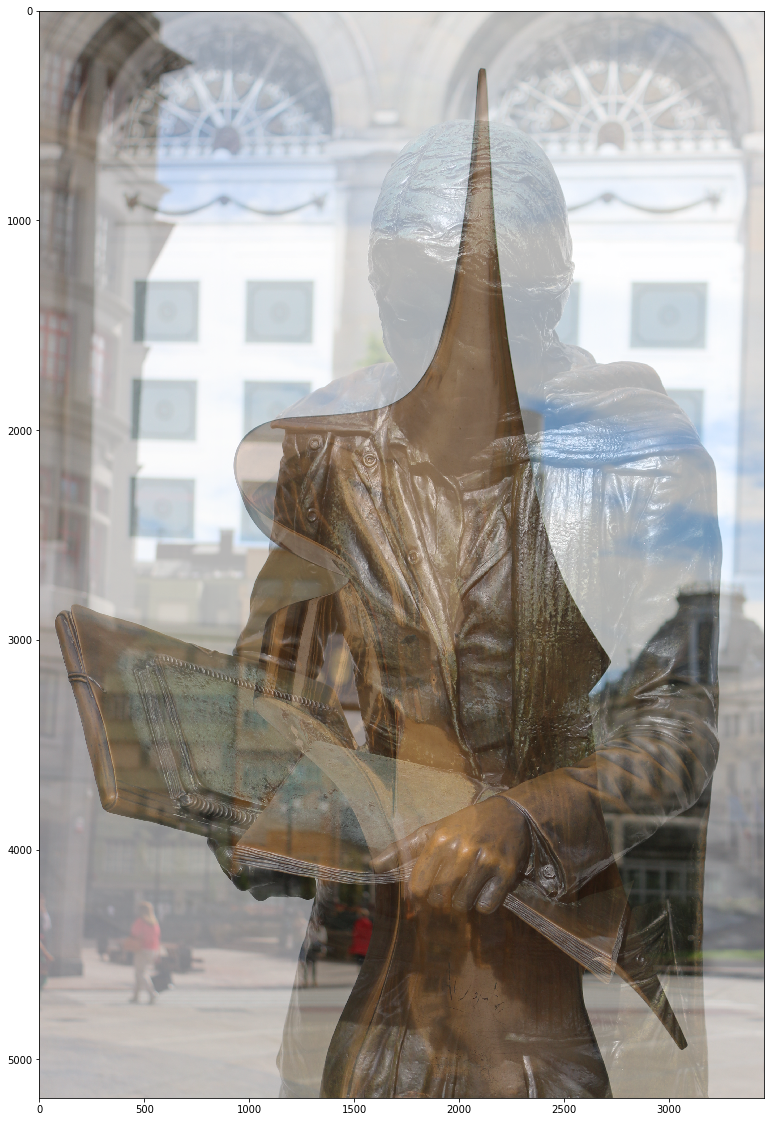

In [10]:
f, a = plt.subplots(figsize=(18,20))
a.imshow(imagen_fusionada)
plt.show()